<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Ayudantia/Inf_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Regresión no lineal. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
sustrato_conc=[0.038,	0.194	,0.425,	0.626	,1.253,	2.500	,3.740]
reaction_tasa=[0.050,	0.127,	0.094,	0.2122,	0.2729,	0.2665,	0.3317]

*   $r$ es la tasa \\
*   $[S]$ es la concentración del sustrato\\
*   $V$ y $K$ constantes por determinar \\

$$r=\frac{V\cdot[S]}{K+[S]}=:F(S,\beta)$$

In [45]:
def Newton(B_0,f_prime,Hess_approx,tol=10**(-6),Max_iter=1000):
    norm_approx=np.linalg.norm(r(B_0))
    iter=0
    history=[]
    while(iter<Max_iter and norm_approx>tol):
        history.append(norm_approx)
        norm_approx=np.linalg.norm(np.transpose(J(B_0))@r(B_0))
        B_0=B_0-np.dot(np.linalg.inv(Hess_approx(B_0)),np.dot(np.transpose(J(B_0)),r(B_0)))
        iter+=1
    if(iter==Max_iter):
        print("Numero de iteraciones alcanzadas. ")
    return B_0,history

$$res(V,K)=||r-\frac{V\cdot[S]}{K+[S]}||^2$$
$$J_{res}(V,K)=\begin{pmatrix}\frac{\partial res_1}{\partial V}&\frac{\partial res_1}{\partial K}\\
\vdots&\vdots\\
\frac{\partial res_n}{\partial V}&\frac{\partial res_n}{\partial K}\\
\end{pmatrix}$$
Con $$\frac{\partial res_i}{\partial V}=-\frac{S}{K+S}$$
$$\frac{\partial res_i}{\partial K}=\frac{VS}{(K+S)^2}$$

Entonces se apoxima la Hessiana con $J_{res}^T J_{res}$

In [31]:
def r(B_0):
    return np.array([reaction_tasa[i]-B_0[0]*sustrato_conc[i]/(B_0[1]+sustrato_conc[i]) for i in range(len(sustrato_conc))])
def J(B_0):
    matrix=np.zeros((len(sustrato_conc),2))
    for i in range(len(sustrato_conc)):
        matrix[i,0]=-(sustrato_conc[i])/(B_0[1]+sustrato_conc[i])
        matrix[i,1]=(B_0[0]*sustrato_conc[i])/(B_0[1]+sustrato_conc[i])**2
    return matrix
def Hess(B_0):
    return np.dot(np.transpose(J(B_0)),J(B_0))

In [46]:
parametros,history=Newton(B_0=[0.9,0.2],f_prime=J,Hess_approx=Hess)

Parametros optimos:  [0.3618367  0.55626545]


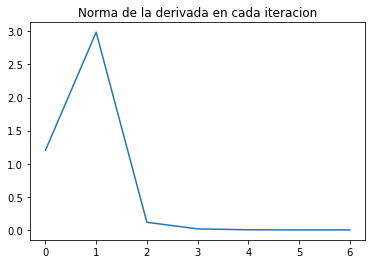

In [50]:
print("Parametros optimos: ", parametros)
plt.plot(history)
plt.title("Norma de la derivada en cada iteracion")
plt.show()

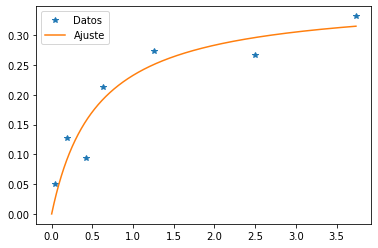

In [61]:
plt.plot(sustrato_conc,reaction_tasa,'*',label='Datos')
t=np.arange(0,np.max(sustrato_conc),0.001)
plt.plot(t, parametros[0]*np.array((t)/(parametros[1]+t)),label='Ajuste')
plt.legend()
plt.show()